In [ ]:
%pip install catboost

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Modelling
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings

In [8]:
df = pd.read_csv('D:/student-pred/notebook/StudentPerformanceFactors.csv')

In [9]:
df.head()

,Academic_history,Attendance,Parental_support,Access_to_resources,Extracurricular_Activities,Mental_health,Previous_Scores,Motivation_Level,Internet_Access,Academic_support,Family_Income,Understand_ability,School_Type,Peer_Influence,Physical_Activity,Mental_illness,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


In [10]:
X = df.drop(columns=['Exam_Score'],axis=1)

In [11]:
X.head()

,Academic_history,Attendance,Parental_support,Access_to_resources,Extracurricular_Activities,Mental_health,Previous_Scores,Motivation_Level,Internet_Access,Academic_support,Family_Income,Understand_ability,School_Type,Peer_Influence,Physical_Activity,Mental_illness,Parental_Education_Level,Distance_from_Home,Gender
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female


In [12]:
y = df['Exam_Score']

In [13]:
y.head()

0    67
1    61
2    74
3    71
4    70
Name: Exam_Score, dtype: int64

In [14]:
# Create Column Transformer with 3 types of transformers
num_features = X.select_dtypes(exclude="object").columns
cat_features = X.select_dtypes(include="object").columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, cat_features),
         ("StandardScaler", numeric_transformer, num_features),
    ]
)

In [15]:
X = preprocessor.fit_transform(X)

In [16]:
X.shape

(6607, 43)

In [17]:
# separate dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

((5285, 43), (1322, 43))

Create an Evaluate Function to give all metrics after model Training

In [18]:
def evaluate_model(true, predicted):
  mae = mean_absolute_error(true, predicted)
  mse = mean_squared_error(true, predicted)
  rmse = np.sqrt(mean_squared_error(true, predicted))
  r2_square = r2_score(true, predicted)
  return mae, rmse, r2_square

In [19]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(),
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}
model_list = []
r2_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)


    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')

    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)

    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 2.0847
- Mean Absolute Error: 0.4982
- R2 Score: 0.7175
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 1.8034
- Mean Absolute Error: 0.4499
- R2 Score: 0.7699


Lasso
Model performance for Training set
- Root Mean Squared Error: 3.0411
- Mean Absolute Error: 1.9606
- R2 Score: 0.3987
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 2.8196
- Mean Absolute Error: 1.9064
- R2 Score: 0.4376


Ridge
Model performance for Training set
- Root Mean Squared Error: 2.0847
- Mean Absolute Error: 0.4982
- R2 Score: 0.7175
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 1.8033
- Mean Absolute Error: 0.4499
- R2 Score: 0.7699




d:\student-pred\pred\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "d:\student-pred\pred\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\Users\Taiyaba Akhtar\AppData\Local\Programs\Python\Python311\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Taiyaba Akhtar\AppData\Local\Programs\Python\Python311\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\Users\Taiyaba Akhtar\AppData\Local\Progra

K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 2.2267
- Mean Absolute Error: 1.2483
- R2 Score: 0.6776
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 2.5376
- Mean Absolute Error: 1.5218
- R2 Score: 0.5444


Decision Tree
Model performance for Training set
- Root Mean Squared Error: 0.0000
- Mean Absolute Error: 0.0000
- R2 Score: 1.0000
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 3.1477
- Mean Absolute Error: 1.6097
- R2 Score: 0.2991


Random Forest Regressor
Model performance for Training set
- Root Mean Squared Error: 0.9096
- Mean Absolute Error: 0.4309
- R2 Score: 0.9462
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 2.1416
- Mean Absolute Error: 1.0854
- R2 Score: 0.6755


XGBRegressor
Model performance for Training set
- Root Mean Squared Error: 0.5933
- Mean Absolute Error: 0.3309
- R2 Score: 0.9771
--

In [20]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
2,Ridge,0.769938
0,Linear Regression,0.769928
7,CatBoosting Regressor,0.740857
5,Random Forest Regressor,0.675522
6,XGBRegressor,0.669318
3,K-Neighbors Regressor,0.544432
1,Lasso,0.437564
4,Decision Tree,0.299069
8,AdaBoost Regressor,-0.678644


In [21]:
lin_model = LinearRegression(fit_intercept=True)
lin_model = lin_model.fit(X_train, y_train)
y_pred = lin_model.predict(X_test)
score = r2_score(y_test, y_pred)*100
print(" Accuracy of the model is %.2f" %score)

 Accuracy of the model is 76.99


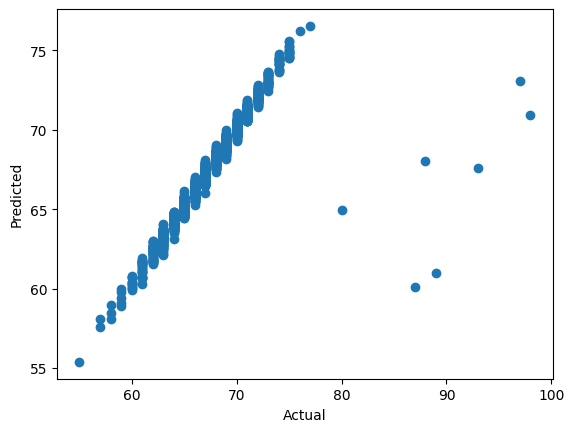

In [22]:
plt.scatter(y_test,y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');

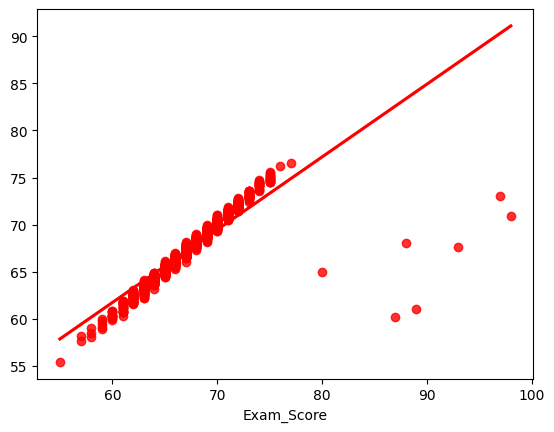

In [23]:
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red');

In [24]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
743,65,64.530589,0.469411
5551,65,65.261374,-0.261374
3442,71,71.536378,-0.536378
6571,64,64.268992,-0.268992
4204,66,66.524996,-0.524996
...,...,...,...
4709,69,68.751337,0.248663
3664,72,72.439865,-0.439865
5231,66,66.170614,-0.170614
1773,63,63.415111,-0.415111
